# Logistic Regression — Binary Classification

## Objective
In this notebook, we will:
- Understand the concept of **Logistic Regression** for classification.
- Learn how it differs from Linear Regression.
- Build and evaluate a binary classification model using **Scikit-learn**.
- Visualize decision boundaries and interpret model coefficients.

---

### What is Logistic Regression?
Logistic Regression is a **supervised learning algorithm** used for **classification tasks**.  
Despite the name, it is **not used for regression problems**, but rather to **predict categorical outcomes** (e.g., Yes/No, Spam/Not Spam, 0/1).

It uses the **sigmoid (logistic) function** to map real-valued inputs into a probability between **0 and 1**.

\[
P(y=1|x) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + ... + b_nx_n)}}
\]

If the probability > 0.5 → Class 1  
Else → Class 0

---

### Real-world examples
- Email Spam Detection (Spam / Not Spam)
- Disease Prediction (Has disease / Healthy)
- Loan Default Prediction (Default / No Default)


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

## Step 1: Load and Explore the Dataset

We will use the **Breast Cancer dataset** from Scikit-learn, which is a classic binary classification dataset.

- Target: `malignant (1)` or `benign (0)`
- Features: mean radius, texture, perimeter, area, etc.


In [2]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display shape and top rows
print("Shape of dataset:", X.shape)
X.head()


Shape of dataset: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Step 2: Explore the Data

Let’s understand the data by:
- Checking for missing values
- Viewing statistical summaries
- Understanding class distribution


Missing values:
 False


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


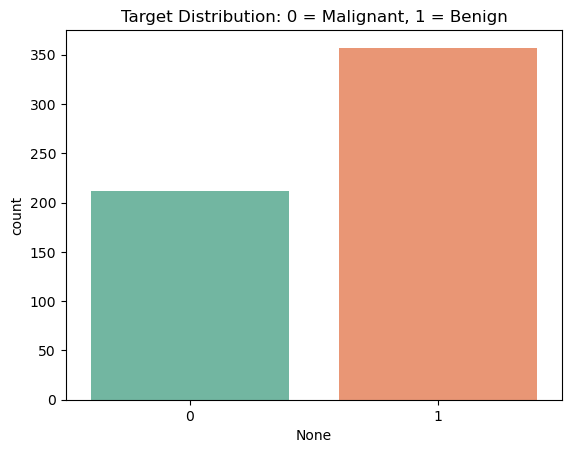

In [5]:
# Check for missing values
print("Missing values:\n", X.isnull().sum().any())

# Basic statistics
display(X.describe())

# Class distribution
sns.countplot(x=y, hue=y, palette="Set2", legend=False)
plt.title("Target Distribution: 0 = Malignant, 1 = Benign")
plt.show()

## Step 3: Split the Data

We split our dataset into:
- **Training set (80%)** — for training the model  
- **Testing set (20%)** — for evaluating model performance

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 455
Testing samples: 114


## Step 4: Train Logistic Regression Model

We’ll create an instance of `LogisticRegression` and train it on our training data.

In [7]:
# Create and train logistic regression model
model = LogisticRegression(max_iter=10000, solver='lbfgs')
model.fit(X_train, y_train)

# Model coefficients
print("Intercept:", model.intercept_)
print("Number of features:", len(model.coef_[0]))


Intercept: [29.20320369]
Number of features: 30


## Step 5: Evaluate Model Performance

We’ll use several metrics to evaluate performance:
- **Accuracy**
- **Confusion Matrix**
- **Precision, Recall, F1-score**
- **ROC Curve and AUC**

Accuracy: 0.9649122807017544


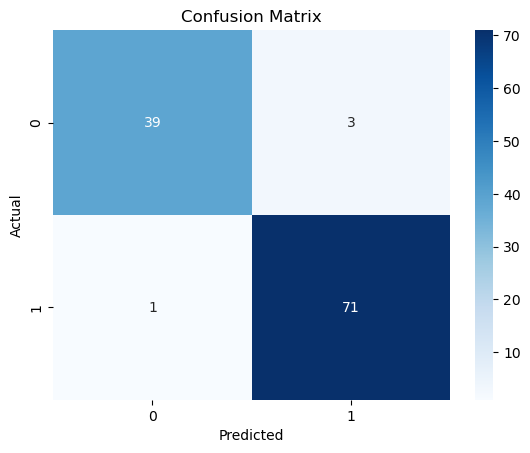

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [8]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


## Step 6: ROC Curve and AUC

The **Receiver Operating Characteristic (ROC)** curve shows the trade-off between **True Positive Rate (Recall)** and **False Positive Rate**.

The **AUC (Area Under Curve)** measures model separability.

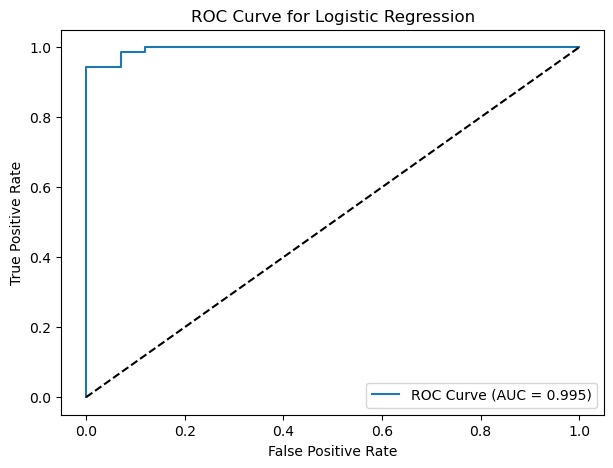

In [9]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()


## Step 7: Interpreting Feature Importance

In Logistic Regression, the **model coefficients** indicate how much each feature contributes to the prediction.

A positive coefficient increases the likelihood of the target being 1, while a negative coefficient decreases it.

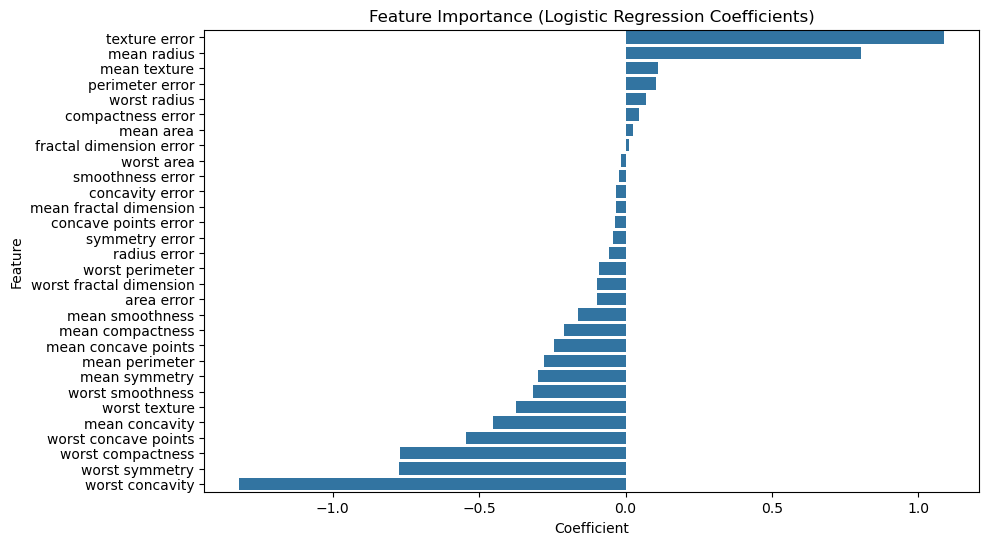

In [10]:
# Feature importance (coefficients)
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

## Step 8: Summary

### Key Learnings:
- Logistic Regression is ideal for **binary classification**.
- It outputs **probabilities** instead of direct class labels.
- The **sigmoid function** helps convert predictions to probabilities.
- Evaluation metrics like **AUC**, **Precision**, and **Recall** give a complete performance picture.
- Coefficients help interpret feature contributions.

---

### Next Steps:
- Try **Multiclass Logistic Regression** on datasets like Iris.
- Apply **Regularization (L1, L2)** to handle overfitting.
- Experiment with **StandardScaler** for feature scaling.
